### Main Questions/Hypotheses: 

1. How has pop music changed from the 1990s to the 2010s?
   - linear reg
3. What characteristics determine a popular song?
    - correlation

## Libraries/Prelimaries

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [454]:
## load in data: 
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Cleaning Data: 

In [455]:
## remove unnecessary columns/na values: 
df = df.drop(['speechiness', 'key', 'mode'], axis = 1)

In [456]:
#look for duplicates 
dup = df.duplicated(keep = False)
dups = df[dup]

In [457]:
dups.sort_values('artist').head(6)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre
1456,Ariana Grande,Love Me Harder,236133,False,2014,74,0.472,0.714,-4.389,0.00937,0.000000,0.0764,0.240,98.992,pop
1562,Ariana Grande,Love Me Harder,236133,False,2014,74,0.472,0.714,-4.389,0.00937,0.000000,0.0764,0.240,98.992,pop
431,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,-3.041,0.68800,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"
324,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,-3.041,0.68800,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,-10.109,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,-10.109,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


In [130]:
## There are 59 duplicates. Although this could imply that the song was popular for multiple years, I think it is odd each duplicate is only duplicated twice. 
## Additionally, based on our project's questions, keeping the duplicates do not benefit us. Therefore, I will remove the duplicates.

In [458]:
df.drop_duplicates(inplace = True, ignore_index = False, keep = 'first')

In [459]:
## look for na values:  
df.isnull().sum()
#hooray! 

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [461]:
## duration_ms to minute/seconds
df['duration_s'] = df['duration_ms'] / 1000

In [460]:
df.sort_values('year', ascending = False).head(5)
##only three songs form 2020!!! 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre
1991,NSG,Options,240081,True,2020,57,0.836,0.621,-4.684,0.3890,0.000092,0.1040,0.762,101.993,"World/Traditional, hip hop"
568,Will Smith,Switch,197666,False,2020,34,0.873,0.900,-4.325,0.0107,0.000502,0.5560,0.478,102.516,"hip hop, pop"
308,t.A.T.u.,All The Things She Said,214440,True,2020,39,0.527,0.834,-5.767,0.0411,0.005990,0.1050,0.381,179.920,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,-3.497,0.1920,0.002440,0.0863,0.553,120.042,hip hop
1939,Lil Nas X,Panini,114893,False,2019,71,0.703,0.594,-6.146,0.3420,0.000000,0.1230,0.475,153.848,"hip hop, pop"


In [462]:
#drops rows that contain songs from 2020 and 1998 
df.drop([1991, 568, 308, 44], inplace = True)

### Question 1: How has pop music changed over two decades? 

In [169]:
## subset df of just pop music

In [463]:
pop_df = df[df['genre'].str.strip().str.lower() == 'pop'].copy()

In [464]:
pop_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,-5.444,0.3000,0.000018,0.3550,0.894,95.053,pop,211.160
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,-4.806,0.0408,0.001040,0.0845,0.879,172.656,pop,200.560
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,-7.932,0.0328,0.048200,0.3600,0.808,139.066,pop,238.759
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,268863,False,1999,56,0.745,0.958,-9.664,0.0813,0.324000,0.5330,0.960,129.962,pop,268.863
12,Bomfunk MC's,Freestyler,306333,False,2000,55,0.822,0.922,-5.798,0.0291,0.325000,0.2520,0.568,163.826,pop,306.333


### Visualizations 

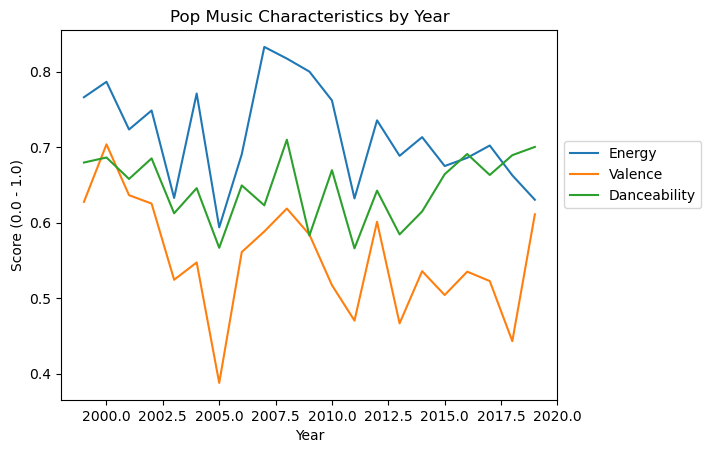

In [465]:
sns.lineplot(x = 'year', y = 'energy', data = pop_df, errorbar = None, label = 'Energy')
sns.lineplot(x = 'year', y = 'valence', data = pop_df, errorbar = None, label = 'Valence')
sns.lineplot(x = 'year', y = 'danceability', data = pop_df, errorbar = None, label = 'Danceability')

plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Score (0.0 - 1.0)')
plt.xlabel('Year')
plt.title('Pop Music Characteristics by Year');

In [501]:
## Energy/Valence/Danceability all had a big dip in 2005. They all very quickly, however, had a resurgence from 2006-2011. Danceability has the most stability over the years. 
## Looks like energy and valence have had a slight downward trend, but with many ups and downs in between. 
## This suggests, perhaps, that music trends come and go- some years we prefer upbeat and energetic songs and other years we prefer slower, more solemn ones. 

In [ ]:
Mean Squared Error: 27.388075916246372
Mean Absolute Error: 4.46461812227009
R-squared: 0.19385537947113918
Intercept: 2019.1732116556511
danceability: 6.747905744933901
energy: -1.0993636739592085
valence: -8.111877572061331
duration_s: -0.04917349097447342
tempo: 0.019163756962010194

Text(0.5, 1.0, 'Average Song Length by Year')

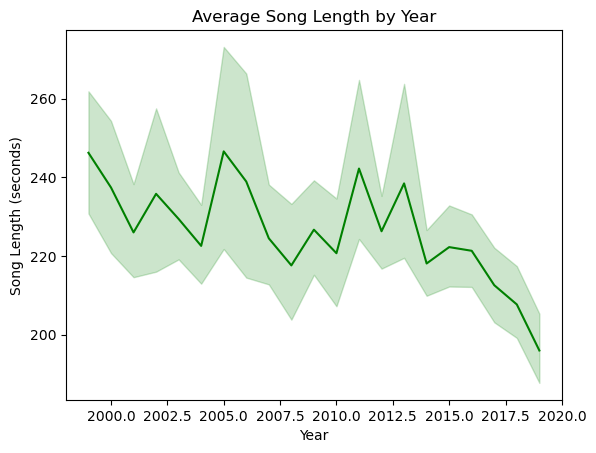

In [416]:
sns.lineplot(x = 'year', y = 'duration_s', data = pop_df, color = 'green')
plt.ylabel('Song Length (seconds)') 
plt.xlabel('Year')
plt.title('Average Song Length by Year')

In [503]:
## A clear trend of average song length's decreasing over the years. 
## Many people theorize that it could be due to the rising popularity of song streaming websites, like Spotify and Apple Music, and the decrease in radio streams. 
## Shorter songs are easier (and literally faster) to generate streams, and thus increasing the artists' profits/monthly listens. 

Text(0.5, 1.0, 'Average Tempo by Year')

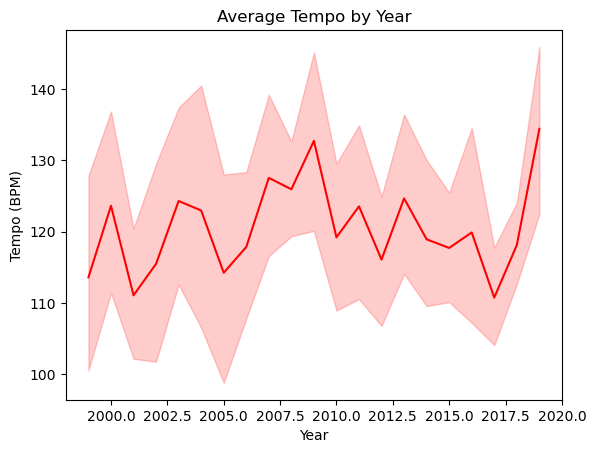

In [417]:
sns.lineplot(x = 'year', y = 'tempo', data = pop_df, color = 'red')
plt.ylabel('Tempo (BPM)') 
plt.xlabel('Year')
plt.title('Average Tempo by Year')

In [554]:
## It looks like there has been an increase in the average tempo over the years. Similar to the first figure, there are many highs and lows, 
## implying a pendulumn-like trend in song tempos. This aligns with our findings of an increase in danceability over the years.

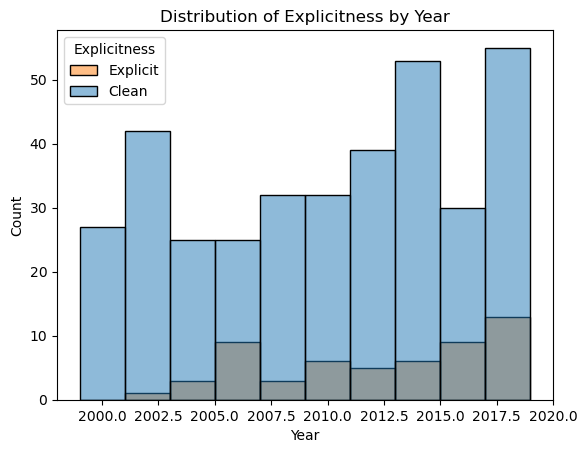

In [418]:
legend_labels = {True: 'Explicit', False: 'Clean'}

sns.histplot(x='year', hue='explicit', data=pop_df)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Explicitness by Year')

# Create custom legend
plt.legend(title='Explicitness', labels=[legend_labels[True], legend_labels[False]])


In [505]:
## Songs seem to be increasing in explicitness. 

In [341]:
X_new = [[0.695, 0.762, 0.553, 215.28, 120.042]]  # Example values for danceability, energy, valence, duration, tempo
predicted_year = model.predict(X_new)
print("Predicted Release Year for New Song:", predicted_year[0])


Predicted Release Year for New Song: 2010.4758636088195


/Users/ruthcarter/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [419]:
from sklearn.metrics import confusion_matrix


X = df[['year']]  # Independent variable
y = df[['danceability', 'energy', 'valence', 'duration_s', 'tempo']]  # Dependent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the dependent variables on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

print("Intercept:", model.intercept_)

for variable, coefficient in zip(y.columns, model.intercept_):
    print(f"{variable} y-int: {coefficient}")

for variable, coefficient in zip(y.columns, model.coef_):
    print(f"{variable}: {coefficient}")


Mean Squared Error: 447.36329269519103
Mean Absolute Error: 9.940771153121421
R-squared: 0.03734126770455546
Intercept: [-1.77261546e+00  6.47815864e+00  1.56417051e+01  4.39515910e+03
 -5.51009709e+02]
danceability y-int: -1.7726154637447677
energy y-int: 6.478158643314827
valence y-int: 15.641705111298297
duration_s y-int: 4395.159100785394
tempo y-int: -551.0097093880656
danceability: [0.00121362]
energy: [-0.00286364]
valence: [-0.00750952]
duration_s: [-2.07350577]
tempo: [0.33392631]


<Axes: xlabel='year', ylabel='valence'>

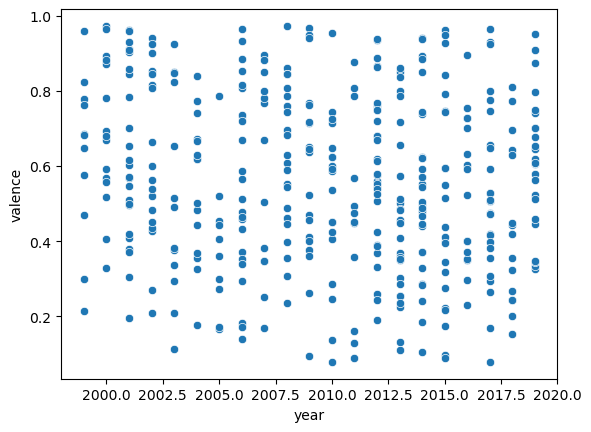

In [420]:
sns.scatterplot(x = 'year', y = 'valence', data = pop_df)

In [422]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA tests for each variable
variables = ['danceability', 'energy', 'valence', 'duration_s', 'tempo']
for var in variables:
    model = ols(f'{var} ~ C(year)', data=df).fit()

    print(f"\nANOVA test for {var}:")

    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)



ANOVA test for danceability:
             sum_sq      df         F        PR(>F)
C(year)    1.481587    20.0  3.859077  1.839224e-08
Residual  36.779784  1916.0       NaN           NaN

ANOVA test for energy:
             sum_sq      df         F        PR(>F)
C(year)    2.508286    20.0  5.627766  2.061961e-14
Residual  42.697910  1916.0       NaN           NaN

ANOVA test for valence:
             sum_sq      df         F        PR(>F)
C(year)    5.491662    20.0  5.908078  2.195393e-15
Residual  89.047778  1916.0       NaN           NaN

ANOVA test for duration_s:
                sum_sq      df          F        PR(>F)
C(year)   3.538086e+05    20.0  12.871193  3.436414e-40
Residual  2.633389e+06  1916.0        NaN           NaN

ANOVA test for tempo:
                sum_sq      df         F    PR(>F)
C(year)   2.937355e+04    20.0  2.041854  0.004195
Residual  1.378152e+06  1916.0       NaN       NaN


### Question 2: What characteristics determine a popular song?

<Axes: xlabel='popularity', ylabel='Count'>

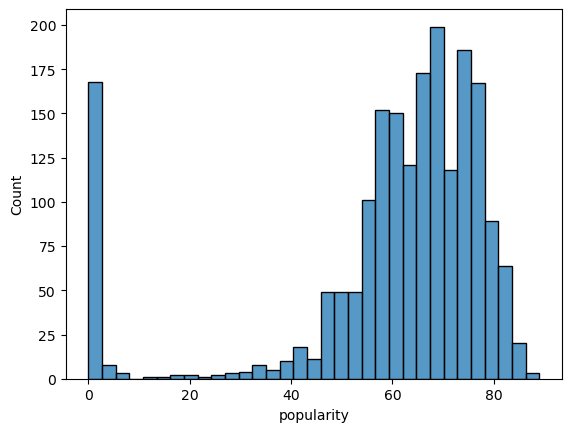

In [474]:
sns.histplot(x='popularity', data = df)

In [506]:
### Its super weird to have so many 0 values. It must be a data entry, so I will remove all 0 popularity value rows

In [548]:
sorted_values = df.sort_values('popularity')[:179]
popular_df = df.drop(sorted_values.index)

<Axes: xlabel='popularity', ylabel='energy'>

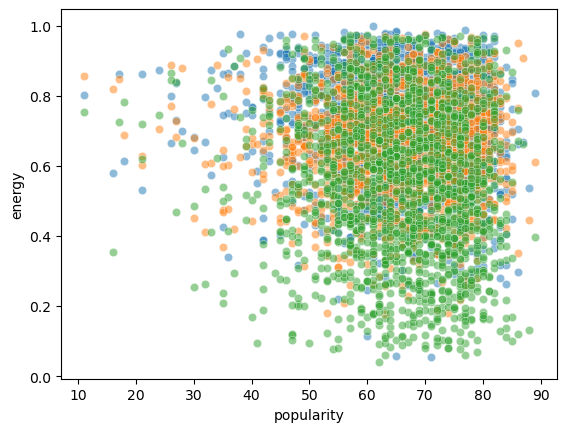

In [552]:
sns.scatterplot(x = 'popularity', y= 'energy', data = popular_df, alpha = .5)
sns.scatterplot(x = 'popularity', y= 'danceability', data = popular_df, alpha = .5)
sns.scatterplot(x = 'popularity', y= 'valence', data = popular_df, alpha = .5)



In [527]:
cor_mat_df = df[['danceability', 'valence', 'energy', 'year', 'tempo', 'popularity']]

              danceability   valence    energy      year     tempo  popularity
danceability      1.000000  0.403746 -0.103179  0.034509 -0.167254    0.000443
valence           0.403746  1.000000  0.333088 -0.209182 -0.023014   -0.011589
energy           -0.103179  0.333088  1.000000 -0.113795  0.150806   -0.012853
year              0.034509 -0.209182 -0.113795  1.000000  0.075937   -0.005724
tempo            -0.167254 -0.023014  0.150806  0.075937  1.000000    0.011369
popularity        0.000443 -0.011589 -0.012853 -0.005724  0.011369    1.000000


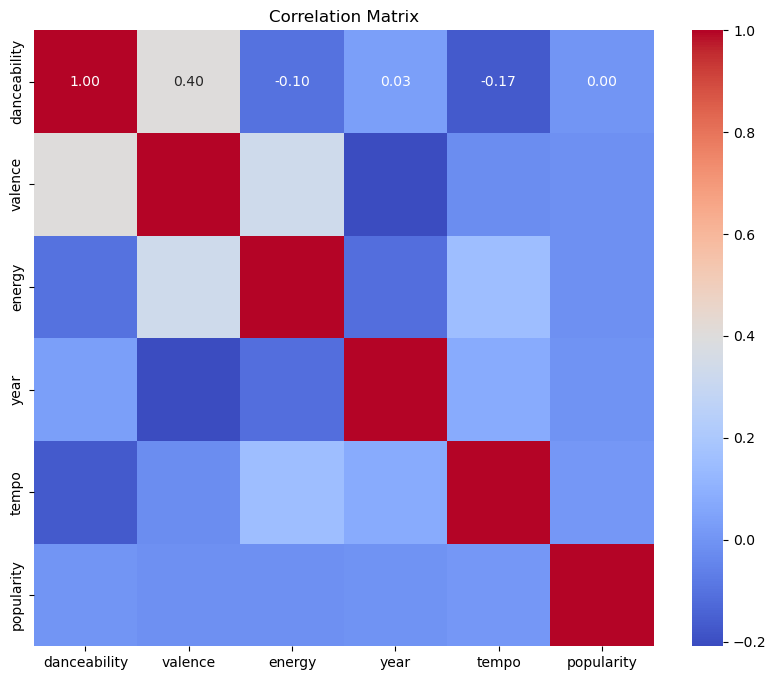

In [553]:

# Calculate the correlation matrix
correlation_matrix = cor_mat_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Generate heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [557]:
## No notable correlations with popularity :( 